# Measuring Intergeneric Allusion with Tesserae

## Imports

In [1]:
# General
import os
import glob

# Data Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

## Variables

In [3]:
unit = "line"
data_dir = '../data/' + unit + '/preprocessed/'
cutoff = 7

## Data

In [4]:
filenames = np.array(glob.glob(data_dir+'*.csv'))

names = filenames
names = [os.path.basename(name) for name in names]
names = [os.path.splitext(name)[0] for name in names]
names = [name.replace('lucan-','') for name in names]

In [5]:
dfs = [pd.read_csv(filename) for filename in filenames]
vergil_df = dfs[-1]

In [6]:
# Works/lines
ovid_amores_book_lengths = [763, 812, 870]
ovid_ars_book_lengths = [772, 746, 812]
ovid_heroides_book_lengths = [116, 148, 154, 176, 150, 166, 198, 120, 168, 152, 130, 214, 160, 130, 220, 378, 268, 218, 210, 244, 250 ]
ovid_medicamina_book_lengths = [100]
ovid_remedia_book_lengths = [814]
propertius_book_lengths = [703, 1359, 986, 934]
tibullus_book_lengths = [811, 430, 688]
vergil_book_lengths = [756, 804, 718, 705, 871, 901, 817, 731, 818, 908, 915, 952]

book_lengths = [sum(ovid_amores_book_lengths),sum(ovid_ars_book_lengths),sum(ovid_heroides_book_lengths),sum(ovid_medicamina_book_lengths),sum(ovid_remedia_book_lengths),sum(propertius_book_lengths),sum(tibullus_book_lengths),sum(vergil_book_lengths)]

counts = [] 
for df in dfs: 
    temp = len(df.index)
    counts.append(temp)

### Table 1

In [17]:
for i, df in enumerate(dfs):
    print(os.path.split(filenames[i])[1], len(df))

lucan-ovid-amores.csv 9966
lucan-ovid-ars_amatoria.csv 9235
lucan-ovid-heroides.csv 18646
lucan-ovid-medicamina.csv 285
lucan-ovid-remedia_amoris.csv 3711
lucan-propertius-elegies.csv 13812
lucan-tibullus-elegies.csv 6860
lucan-vergil-aeneid.csv 46385


### Table 2

In [19]:
for i, df in enumerate(dfs):
    print(os.path.split(filenames[i])[1], book_lengths[i], len(df), len(df) / book_lengths[i] * 100)

lucan-ovid-amores.csv 2445 9966 407.60736196319016
lucan-ovid-ars_amatoria.csv 2330 9235 396.3519313304721
lucan-ovid-heroides.csv 3970 18646 469.67254408060455
lucan-ovid-medicamina.csv 100 285 285.0
lucan-ovid-remedia_amoris.csv 814 3711 455.8968058968059
lucan-propertius-elegies.csv 3982 13812 346.86087393269713
lucan-tibullus-elegies.csv 1929 6860 355.6246759979264
lucan-vergil-aeneid.csv 9896 46385 468.7247372675829


### Table 3

In [43]:
tibullus = dfs[6].loc[dfs[6]['SCORE'] >= cutoff]

cutoffs = [df.loc[df['SCORE'] >= cutoff] for df in dfs]
scores = [df.groupby('SCORE').agg({'SCORE': [np.size]}) for df in cutoffs]

scores_100 = []

for i, score in enumerate(scores):
    score_100 = score['SCORE']['size'].map(lambda x: round((x / book_lengths[i]) * 100,2))
    scores_100.append(score_100)

for i, score in enumerate(scores_100):
    print(os.path.split(filenames[i])[1], score, '\n')

lucan-ovid-amores.csv SCORE
7     75.83
8     18.45
9      2.74
10     0.49
Name: size, dtype: float64 

lucan-ovid-ars_amatoria.csv SCORE
7     72.27
8     14.98
9      2.79
10     0.13
Name: size, dtype: float64 

lucan-ovid-heroides.csv SCORE
7     79.07
8     18.49
9      4.26
10     0.13
Name: size, dtype: float64 

lucan-ovid-medicamina.csv SCORE
7     33
8      6
9      2
10     1
Name: size, dtype: float64 

lucan-ovid-remedia_amoris.csv SCORE
7     71.62
8     12.41
9      1.84
10     0.25
Name: size, dtype: float64 

lucan-propertius-elegies.csv SCORE
7     67.88
8     15.77
9      3.16
10     0.33
Name: size, dtype: float64 

lucan-tibullus-elegies.csv SCORE
7     76.31
8     18.56
9      2.64
10     0.31
Name: size, dtype: float64 

lucan-vergil-aeneid.csv SCORE
7     87.76
8     21.38
9      5.70
10     0.87
Name: size, dtype: float64 



### Figure 1

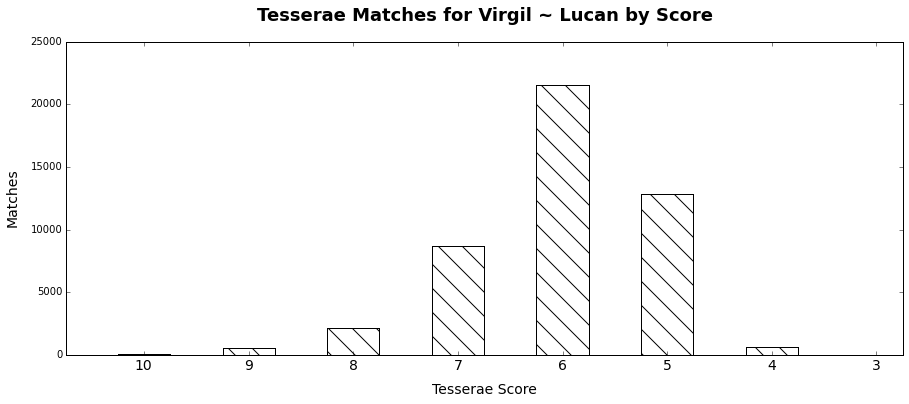

In [58]:
vergil_total = vergil_df.groupby('SCORE').agg({'SCORE': [np.size]})

y = np.array(vergil_total['SCORE']['size'])

N = 8
ind = np.arange(N)  # the x locations for the groups
width = .5       # the width of the bars

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, y, width, color='w', hatch='\\')

t =  plt.title('Tesserae Matches for Virgil ~ Lucan by Score', fontsize = 18, fontweight = 'bold')
t.set_y(1.05)
fig.subplots_adjust(top=0.85)

ax.xaxis.labelpad = 10 
ax.yaxis.labelpad = 10 

ax.set_xlabel('Tesserae Score', fontsize = 14)
ax.set_ylabel('Matches', fontsize = 14)

ax.set_xticks(ind+width/2)
ax.tick_params(axis='x', labelsize = 14)
ax.set_xticklabels( ('3', '4', '5', '6', '7', '8', '9','10') )

ax.invert_xaxis()

plt.show()

### Figure 2

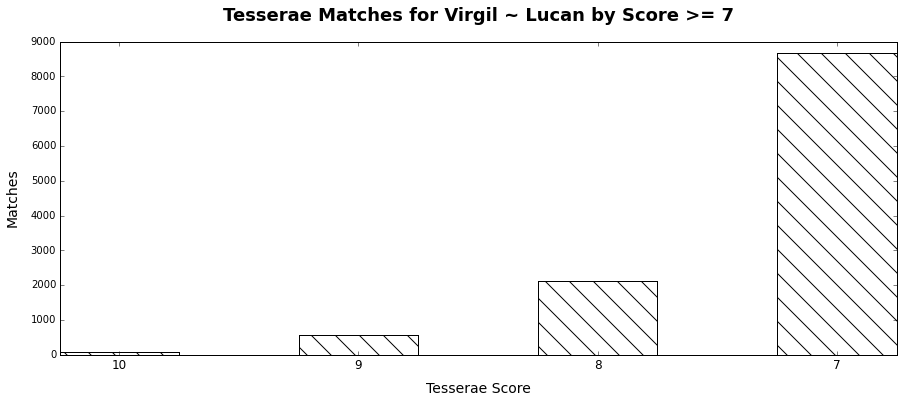

In [60]:
vergil_df_over_6 = vergil_df[vergil_df['SCORE'] >= 7]
vergil_df_over_6_total = vergil_df_over_6.groupby('SCORE').agg({'SCORE': [np.size]})

y = np.array(vergil_df_over_6_total['SCORE']['size'])

N = 4
ind = np.arange(N)  # the x locations for the groups
width = .5       # the width of the bars

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, y, width, color='w', hatch='\\')

t =  plt.title('Tesserae Matches for Virgil ~ Lucan by Score >= 7', fontsize = 18, fontweight = 'bold')
t.set_y(1.05)
fig.subplots_adjust(top=0.85)

ax.xaxis.labelpad = 10 
ax.yaxis.labelpad = 10 

ax.set_xlabel('Tesserae Score', fontsize = 14)
ax.set_ylabel('Matches', fontsize = 14)
ax.set_xticks(ind+width/2)
ax.tick_params(axis='x', labelsize = 12)
ax.set_xticklabels( ('7', '8', '9','10') )

ax.invert_xaxis()

plt.show()

In [33]:
### Figure 3

In [34]:
### Figure 4

In [35]:
### Figure 5

In [9]:
dfs_cutoff = []

for df in dfs:
    dfs_cutoff.append(df[df['SCORE'] >= cutoff])

In [10]:
scores = []

for df in dfs_cutoff: 
    temp = df.groupby('SCORE').agg({'SCORE': [np.size]})
    scores.append(temp)


In [11]:
results = [list(x) for x in zip(names, book_lengths, dfs_cutoff, scores)]

### Frequency

In [12]:
for result in results:
    result[3]['per_100'] = result[3]['SCORE']['size'].map(lambda x: (x / result[1]) * 100)

In [13]:
y1 = list(results[0][3]['per_100'])
y2 = list(results[1][3]['per_100'])
y3 = list(results[2][3]['per_100'])
y4 = list(results[3][3]['per_100'])
y5 = list(results[4][3]['per_100'])
y6 = list(results[5][3]['per_100'])
y7 = list(results[6][3]['per_100'])
y8 = list(results[7][3]['per_100'])
y1 = np.array(results[0][3]['per_100'])
y2 = np.array(results[1][3]['per_100'])
y3 = np.array(results[2][3]['per_100'])
y4 = np.array(results[3][3]['per_100'])
y5 = np.array(results[4][3]['per_100'])
y6 = np.array(results[5][3]['per_100'])
y7 = np.array(results[6][3]['per_100'])
y8 = np.array(results[7][3]['per_100'])

In [14]:
print(y1)
print(y2)
print(y3)
print(y4)
print(y5)
print(y6)
print(y7)
print(y8)

[ 75.82822086  18.44580777   2.7402863    0.49079755]
[ 72.27467811  14.97854077   2.78969957   0.12875536]
[ 79.06801008  18.48866499   4.25692695   0.12594458]
[ 33.   6.   2.   1.]
[ 71.62162162  12.40786241   1.84275184   0.24570025]
[ 67.88046208  15.77096936   3.16423908   0.32646911]
[ 76.30896838  18.55883878   2.64385692   0.31104199]
[ 87.76273242  21.38237672   5.69927243   0.869038  ]


In [15]:
ov = np.average([y1,y2,y3,y4,y5],axis=0)
prop = y6
tib = y7
verg = y8



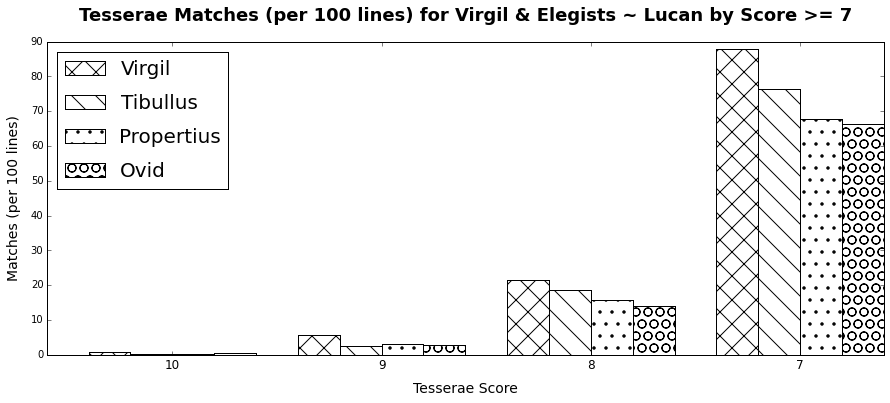

In [62]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, ov, width, color='w', hatch='O')
rects2 = ax.bar(ind+width, prop, width, color='w', hatch='.')
rects3 = ax.bar(ind+width*2, tib, width, color='w', hatch='\\')
rects4 = ax.bar(ind+width*3, verg, width, color='w', hatch='x')
#rects5 = ax.bar(ind+width*4, y5, width, color='w', hatch='*')
#rects6 = ax.bar(ind+width*5, y6, width, color='w', hatch='o')
#rects7 = ax.bar(ind+width*6, y7, width, color='w', hatch='.')
#rects8 = ax.bar(ind+width*7, y8, width, color='w', hatch='O')

t =  plt.title('Tesserae Matches (per 100 lines) for Virgil & Elegists ~ Lucan by Score >= 7', fontsize = 18, fontweight = 'bold')
t.set_y(1.05)
fig.subplots_adjust(top=0.85)

# ax.set_title('Tesserae Matches (per 100 lines) for Virgil and Elegists', fontsize = 18, fontweight = 'bold')

ax.xaxis.labelpad = 10 
ax.yaxis.labelpad = 10 

ax.set_xlabel('Tesserae Score', fontsize = 14)
ax.set_ylabel('Matches (per 100 lines)', fontsize = 14)
ax.set_xticks(ind+width*2)
ax.tick_params(axis='x', labelsize = 12)
ax.set_xticklabels( ('7', '8', '9','10') )

ax.invert_xaxis()

auths = ['Virgil', 'Tibullus', 'Propertius', 'Ovid']

ax.legend( (rects4[0], rects3[0], rects2[0], rects1[0]), auths, loc = 2, labelspacing = .75, handlelength = 2, prop={'size':20} )


plt.show()

In [17]:
print(sum(verg))
print(sum(tib))


115.713419563
97.8227060653


In [18]:
import glob

results = pd.DataFrame()
filenames = np.array(glob.glob(data_dir+'*.csv'))

#filenames = [f for f in filenames if 'vergil' not in f]

In [19]:
for file in filenames:
    df = pd.read_csv(file)
    results = results.append(df)

results = results.reset_index(drop=True)



In [20]:
# SEE http://www.swegler.com/becky/blog/2014/08/06/useful-pandas-snippets/
results['TARGET_AUTHOR'], results['TARGET_BOOK'], results['TARGET_LINE'] = zip(*results['TARGET_LOC'].apply(lambda x: x.split('.')))
results['SOURCE_AUTHOR'] = results['SOURCE_LOC'].apply(lambda x: x[:x.index('.')])
#df['A'].apply(str)

results['TARGET_BOOK'] = results['TARGET_BOOK'].apply(int)
results['TARGET_LINE'] = results['TARGET_LINE'].apply(int)

results = results.loc[results['SCORE'] >= 7]


In [21]:
results = results.loc[results['SCORE'] >= 7]


In [22]:
print(results.head())

   RESULT   TARGET_LOC                                         TARGET_TXT  \
0       1  luc. 10.429  Est operis: visum famulis **reparabile** **dam...   
1       2   luc. 2.594  Armenios, **Cilicasque** **feros**, Taurosque ...   
2       3   luc. 2.612   Cecropiae, victum mentitis **Thesea** **velis**.   
3       4   luc. 4.457  Huc fractas Aquilone **rates** **submersaque**...   
4       5   luc. 5.322  Detegit imbelles animos nil **fortiter** **ausa**   

        SOURCE_LOC                                         SOURCE_TXT  \
0  ov. am. 1.14.55  Collige cum vultu mentem! **reparabile** **dam...   
1  ov. am. 2.16.39  Sed Scythiam **Cilicasque** **feros** viridesq...   
2   ov. am. 1.7.15   Talis periuri promissaque **velaque** **Thesei**   
3  ov. am. 2.16.25  Non quae **submersis** **ratibus** saturata Ch...   
4    ov. am. 2.5.9  Felix, qui quod amat defendere **fortiter** **...   

                SHARED  SCORE TARGET_AUTHOR  TARGET_BOOK  TARGET_LINE  \
0  damnum; reparabilis   

In [23]:
#results['SCORE_ADJ'] = 0
#results['SCORE_ADJ'][results['SCORE'] == 10] = 10 * 6.16
#results['SCORE_ADJ'][results['SCORE'] == 9] = 9 * 1
#results['SCORE_ADJ'][results['SCORE'] == 8] = 8 * .225
#results['SCORE_ADJ'][results['SCORE'] == 7] = 7 * .057

In [24]:
results

,RESULT,TARGET_LOC,TARGET_TXT,SOURCE_LOC,SOURCE_TXT,SHARED,SCORE,TARGET_AUTHOR,TARGET_BOOK,TARGET_LINE,SOURCE_AUTHOR
0,1,luc. 10.429,Est operis: visum famulis **reparabile** **dam...,ov. am. 1.14.55,Collige cum vultu mentem! **reparabile** **dam...,damnum; reparabilis,10,luc,10,429,ov
1,2,luc. 2.594,"Armenios, **Cilicasque** **feros**, Taurosque ...",ov. am. 2.16.39,Sed Scythiam **Cilicasque** **feros** viridesq...,ferus; cilicasque,10,luc,2,594,ov
2,3,luc. 2.612,"Cecropiae, victum mentitis **Thesea** **velis**.",ov. am. 1.7.15,Talis periuri promissaque **velaque** **Thesei**,theseus; uela-uelum,10,luc,2,612,ov
3,4,luc. 4.457,Huc fractas Aquilone **rates** **submersaque**...,ov. am. 2.16.25,Non quae **submersis** **ratibus** saturata Ch...,submergo; ratis,10,luc,4,457,ov
4,5,luc. 5.322,Detegit imbelles animos nil **fortiter** **ausa**,ov. am. 2.5.9,"Felix, qui quod amat defendere **fortiter** **...",audeo; fortiter,10,luc,5,322,ov
5,6,luc. 7.420,"Possedit, **citius** **per** prospera fata cuc...",ov. am. 1.8.92,Fit **cito** **per** multas praeda petita manus.,citus; per,10,luc,7,420,ov
6,7,luc. 3.107,**Praetor** adest: **vacuaeque** loco cessere ...,ov. am. 3.2.65,Maxima iam **vacuo** **praetor** spectacula circo,uacuus; praetor,10,luc,3,107,ov
7,8,luc. 4.224,"Eruerent, nulli vallarent **oppida** **muri**,",ov. am. 2.12.7,"Non humiles **muri**, non parvis **oppida** fo...",murus-mus; oppidum,10,luc,4,224,ov
8,9,luc. 6.369,"Quique nec humentes nebulas, nec **rore** **ma...",ov. am. 1.6.55,"Urbe silent tota, vitreoque **madentia** **rore**",ros; madeo,10,luc,6,369,ov
9,10,luc. 4.316,"tunc herbas frondesque terunt, et **rore** **m...",ov. am. 1.6.55,"Urbe silent tota, vitreoque **madentia** **rore**",ros; madeo,10,luc,4,316,ov


In [25]:
epic = results.loc[results['SOURCE_AUTHOR'] == 'verg']
elegy = results.loc[results['SOURCE_AUTHOR'] != 'verg']

In [26]:
elegy.to_csv('out.csv')

In [27]:
def smooth_list(x,window):
    smoothed_list = []
    for i in range(0,len(x)-window):
        smoothed_list.append(sum(x[i:i+window])/window)
    return smoothed_list

In [28]:
def add_blank_scores(x,y,length):
# Numpy agg function (obv.) leaves out lines that have no results, so we need to put the zeroes back in

    z = []

    for i in range(1,length+1):
        if i in x:
            z.append((i,y[x.index(i)]))
        else:
            z.append((i,0))
        
    scores = [list(t) for t in zip(*z)]

    return scores[0],scores[1]

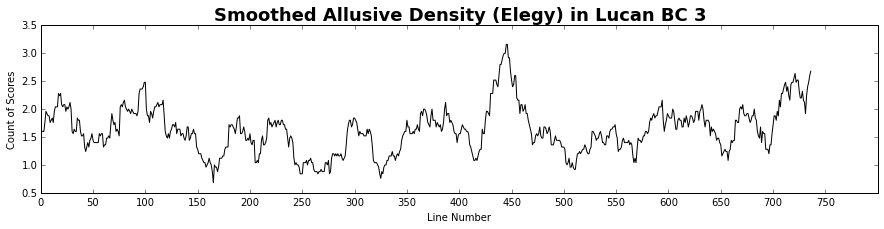

In [29]:
bc3 = elegy.loc[elegy['TARGET_BOOK'] == 3]
bc3 = bc3.sort_index(by=['TARGET_BOOK','TARGET_LINE'], ascending=[True,True])
bc3_scores = bc3.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.count_nonzero]})

x = list(bc3_scores.index)
y = list(bc3_scores['SCORE']['count_nonzero'])

bc3_len = 762
x, y = add_blank_scores(list(bc3_scores.index),list(bc3_scores['SCORE']['count_nonzero']),bc3_len)

window = 25
bc3_smooth = smooth_list(y,window)

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.plot(bc3_smooth, color='k')

xticks = np.arange(0,max(x),50)
ax.set_xticks(xticks)

ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 3',fontsize = 18, fontweight = "bold")
ax.set_xlabel('Line Number')
ax.set_ylabel('Count of Scores')

plt.show()


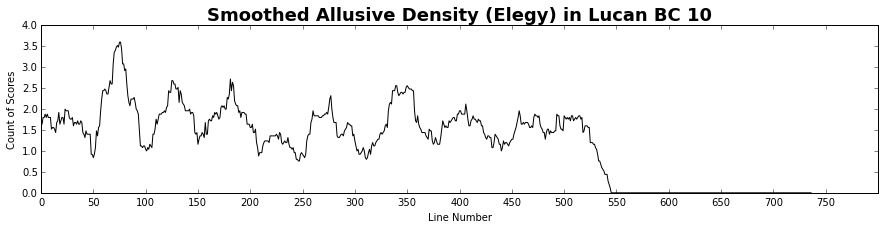

In [30]:
bc10 = elegy.loc[elegy['TARGET_BOOK'] == 10]
bc10 = bc10.sort_index(by=['TARGET_BOOK','TARGET_LINE'], ascending=[True,True])
bc10_scores = bc10.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.count_nonzero]})

x = list(bc10_scores.index)
y = list(bc10_scores['SCORE']['count_nonzero'])

bc10_len = 762
x, y = add_blank_scores(list(bc10_scores.index),list(bc10_scores['SCORE']['count_nonzero']),bc10_len)

window = 25
bc10_smooth = smooth_list(y,window)

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.plot(bc10_smooth, color='k')

xticks = np.arange(0,max(x),50)
ax.set_xticks(xticks)

ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 10',fontsize = 18, fontweight = "bold")
ax.set_xlabel('Line Number')
ax.set_ylabel('Count of Scores')

plt.show()

19.0
0.0
[60, 578]


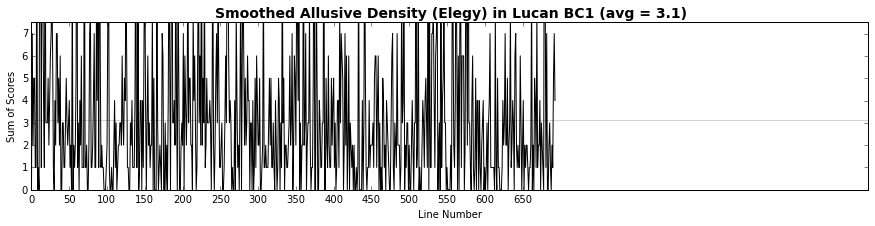

27.0
0.0
[508]


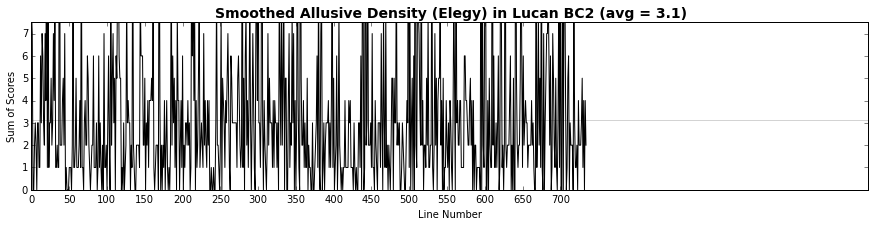

17.0
0.0
[275, 549]


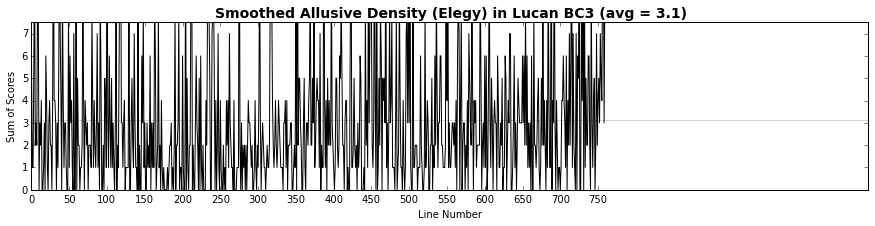

31.0
0.0
[339, 521]


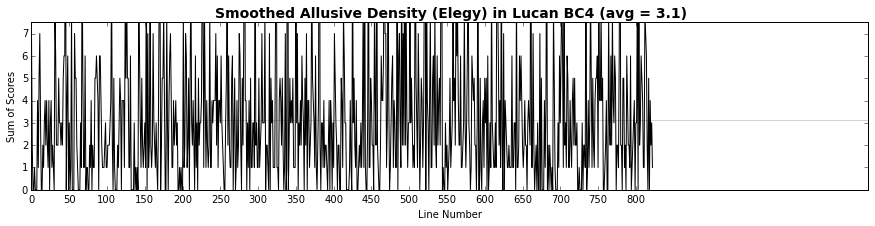

23.0
0.0
[148]


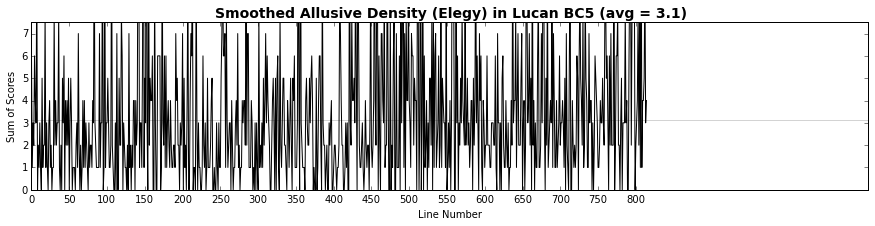

34.0
0.0
[437]


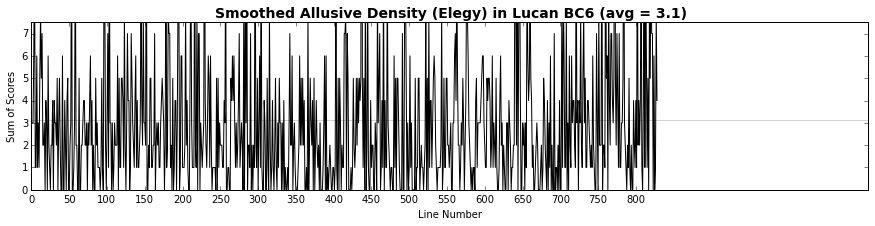

34.0
0.0
[179]


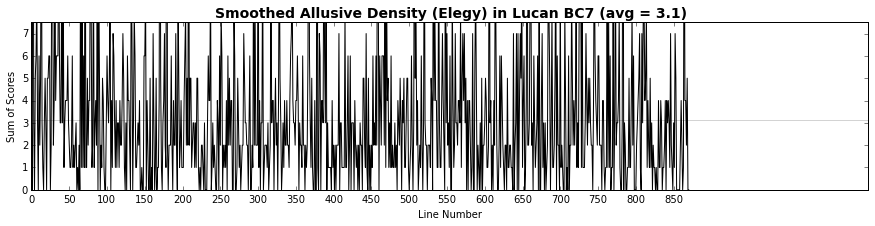

30.0
0.0
[646]


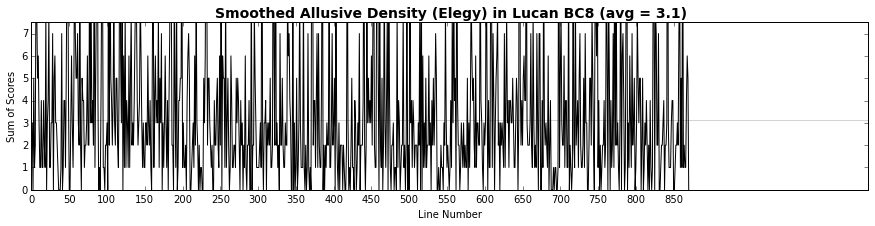

33.0
0.0
[762]


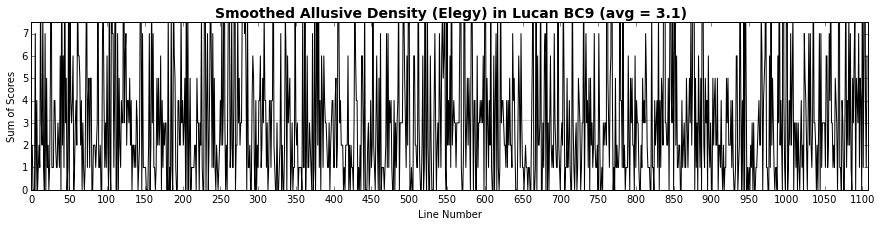

27.0
0.0
[184]


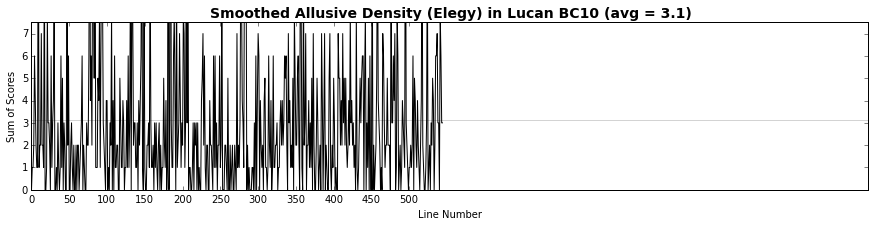

In [31]:
avg = 3.12 # compute programmatically

def plot_allusive_density(results, book, length, window=25):
    subset = results.loc[results['TARGET_BOOK'] == book]
    subset_scores = subset.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.count_nonzero]})
    
    subset_scores_index = list(subset_scores.index)
    subset_scores_list = list(subset_scores['SCORE']['count_nonzero'])
    x, y = add_blank_scores(subset_scores_index,subset_scores_list,length)
    subset_scores_list = y
    
    subset_scores_list_smoothed = smooth_list(subset_scores_list,window)

    #avg = sum(subset_scores_list_smoothed)/len(subset_scores_list)
    
    
    fig = plt.figure()

    fig.set_size_inches(15,3)
    ax = fig.add_subplot(111)
    ax.axhline(y=avg, color='lightgray')
    ax.axhline(y=max(subset_scores_list_smoothed), color='lightgray')
    ax.axhline(y=min(subset_scores_list_smoothed), color='lightgray')

    print(max(subset_scores_list_smoothed))
    print(min(subset_scores_list_smoothed))
    print([i for i, x in enumerate(subset_scores_list_smoothed) if x == max(subset_scores_list_smoothed)])
 
    ax.plot(subset_scores_list_smoothed, color="black")

    xticks = np.arange(0,max(x),50)
    ax.set_xticks(xticks)

    ax.set_ylim([0, 7.5])
    ax.set_xlim([0, 1108])

    ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC' + str(book) + ' (avg = ' + str(round(avg,1)) + ')', fontsize = 14, fontweight = 'bold')
    ax.set_xlabel('Line Number')
    ax.set_ylabel('Sum of Scores')

    plt.show()
    
lucan_book_lengths = [695,736,762,824,816,830,872,872,1108,546]
    
for i in range(1,11):
    plot_allusive_density(results, i, lucan_book_lengths[i-1],window=1)

In [32]:
running_sum  = 2157.52 + 2342.04 + 2249.16 + 2623.6 + 2634.4 + 2365.76 + 2806.2+ 2930.56 + 3512.0 + 1540.48
length = sum(lucan_book_lengths)

print(running_sum/length)


3.121414216598437


### Proportion

### Distribution

### Degree

Let's look first at all Tesserae scores returned for:
   - Source: Vergil, *Aeneid*
   - Target: Lucan, *Bellum Civile*

First, we'll get the Tesserae .csv file into a Pandas dataframe. Note that I've already renamed the raw output from Tesserae and stripped the metadata that Tesserae returns with .csv files.

In [33]:
file = data_dir + 'lucan-vergil-aeneid.csv'
vergil = pd.read_csv(file)
print(vergil.head())

   RESULT   TARGET_LOC                                         TARGET_TXT  \
0       1  luc. 10.122  Fulget gemma toris, et **iaspide** **fulva** s...   
1       2   luc. 8.155  Iam poterant oculis: tanto **devinxit** **amore**   
2       3  luc. 10.135    Vix ulla fuscante tamen **lanugine** **malas**.   
3       4    luc. 6.35  Graiorumque **domos**, **direptaque** moenia t...   
4       5   luc. 8.776   Excitat invalidas admoto **fomite** **flammas**.   

          SOURCE_LOC                                         SOURCE_TXT  \
0   verg. aen. 4.261  conspicit; atque illi stellatus **iaspide** **...   
1   verg. aen. 8.394   Tum pater aeterno fatur **devinctus** **amore**:   
2  verg. aen. 10.324  Tu quoque, flaventem prima **lanugine** **malas**   
3   verg. aen. 2.563     et **direpta** **domus**, et parvi casus Iuli.   
4   verg. aen. 1.176  nutrimenta dedit, rapuitque in **fomite** **fl...   

                  SHARED  SCORE  
0  fuluum-fuluus; iaspis     10  
1         amor; de

Let's see how many total results Tesserae has returned for this search. 

In [34]:
print('There are', len(vergil), 'Tesserae results.')

There are 46385 Tesserae results.


Let's aggregate and count the scores to learn what kind of results Tesserae returns.

In [35]:
vergil_scores = vergil.groupby('SCORE').agg({'SCORE': [np.size]})

print('Aggregated scores for Aeneid > BC')
print(vergil_scores)

print('\n')

x = list(vergil_scores.index)
y = list(vergil_scores['SCORE']['size'])

Aggregated scores for Aeneid > BC
       SCORE
        size
SCORE       
3          6
4        595
5      12805
6      21528
7       8685
8       2116
9        564
10        86




Let's plot this.

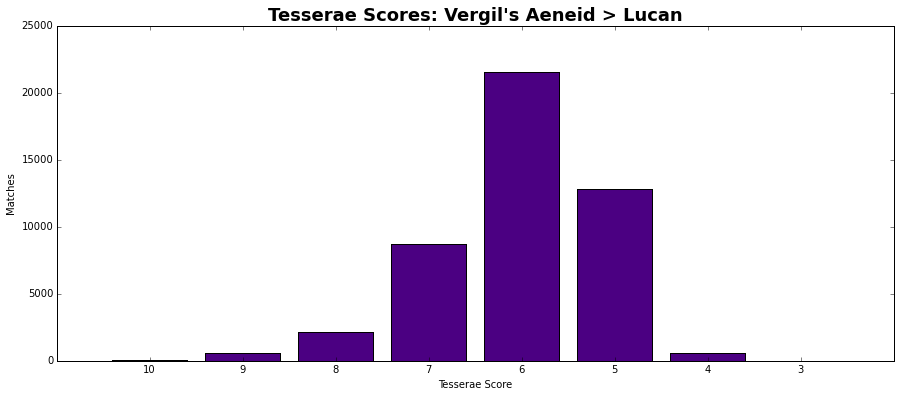

In [36]:
fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)
ax.bar(x, y, align='center',color='indigo')
ax.set_title('Tesserae Scores: Vergil\'s Aeneid > Lucan', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.invert_xaxis()
plt.show()

We can see from this chart that the majority of results have a score of either 5 or 6. Research shows that these scores correspond with less significant intertexts. Let's set a cutoff of 7 for the score we look at and get a subset of the *vergil* dataframe

In [37]:
cutoff = 7
vergil = vergil.loc[vergil['SCORE'] >= cutoff]

print('There are', len(vergil), 'Tesserae results with scores 7 or higher.')


There are 11451 Tesserae results with scores 7 or higher.


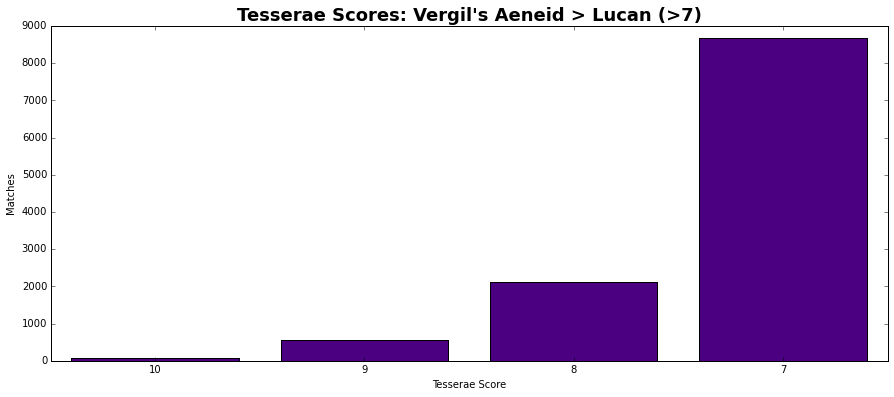

In [38]:
vergil_scores = vergil.groupby('SCORE').agg({'SCORE': [np.size]})

x = list(vergil_scores.index)
y = list(vergil_scores['SCORE']['size'])

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)
ax.bar(x, y, align='center',color='indigo')
ax.set_title('Tesserae Scores: Vergil\'s Aeneid > Lucan (>7)', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.invert_xaxis()
plt.show()

The work of Coffee's team at U. Buffalo has focused on epic-to-epic comparisons such as this. Let's see what kind of results we get from cross-genre searches.

In [39]:
file = data_dir + 'lucan-tibullus-elegies.csv'
tibullus = pd.read_csv(file)
print(tibullus.head())

   RESULT   TARGET_LOC                                         TARGET_TXT  \
0       1  luc. 10.164   Accipiunt sertas nardo **florente** **coronas**,   
1       2  luc. 10.126   Ut mos est Phariis miscendi **licia** **telis**.   
2       3   luc. 9.160  Et **tectum** **lino** spargam per vulgus Osirin,   
3       4   luc. 4.224     Eruerent, nulli vallarent **oppida** **muri**,   
4       5    luc. 9.61  Quidquid ab **extincto** **licuisset** tollere...   

     SOURCE_LOC                                         SOURCE_TXT  \
0   tib. 2.1.59    rure puer uerno primum de **flore** **coronam**   
1   tib. 1.6.79    Firmaque conductis adnectit **licia** **telis**   
2   tib. 1.3.30        Ante sacras **lino** **tecta** fores sedeat   
3  tib. 3.7.174  quin etiam structis exsurgunt **oppida** **mur...   
4   tib. 2.6.16     si **licet**, **extinctas** aspiciamque faces!   

                           SHARED  SCORE  
0                  floreo; corona     10  
1        licium; tela-telis-te

In [40]:
print('There are', len(tibullus), 'Tesserae results.')

There are 6860 Tesserae results.


This is much lower than the results from Vergil's *Aeneid* (46385 v. 6860)

Let's exclude the lower scores as well.

In [41]:
tibullus = tibullus.loc[tibullus['SCORE'] >= cutoff]

print('There are', len(tibullus), 'Tesserae results with scores 7 or higher.')


There are 1887 Tesserae results with scores 7 or higher.


This is also lower (11451 v. 1887)

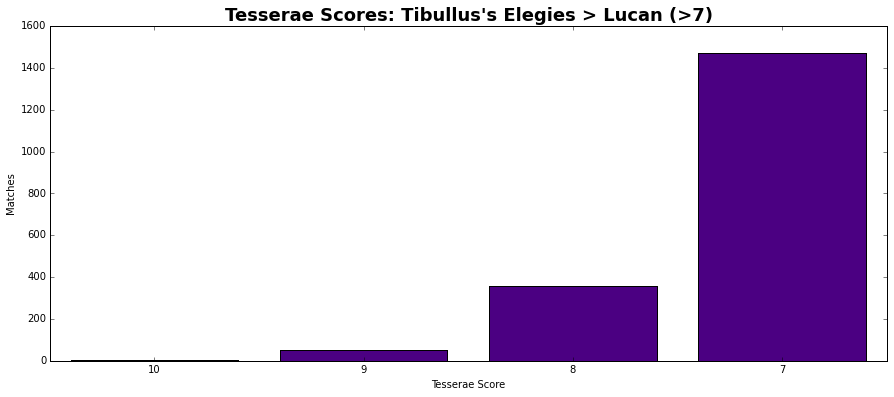

In [42]:
tibullus_scores = tibullus.groupby('SCORE').agg({'SCORE': [np.size]})

x = list(tibullus_scores.index)
y = list(tibullus_scores['SCORE']['size'])

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)
ax.bar(x, y, align='center',color='indigo')
ax.set_title('Tesserae Scores: Tibullus\'s Elegies > Lucan (>7)', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.invert_xaxis()
plt.show()




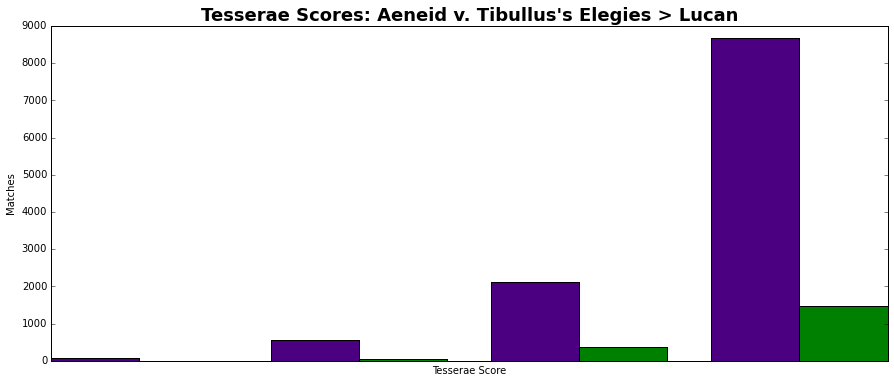

In [43]:
x1 = list(vergil_scores.index)
x2 = list(tibullus_scores.index)
y1 = list(vergil_scores['SCORE']['size'])
y2 = list(tibullus_scores['SCORE']['size'])


n = 4

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)
bar_width = 0.4  # default: 0.8
bar_locations = np.arange(n)

ax.set_title('Tesserae Scores: Aeneid v. Tibullus\'s Elegies > Lucan', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.invert_xaxis()

ax.bar(bar_locations, y1, bar_width, color='indigo')
ax.bar(
    bar_locations - bar_width, 
    y2, 
    bar_width, 
    color='green'
)

plt.show()

But wait... the *Aeneid* is much longer than Tibullus *omnia opera* (the third book being generous included!)

In [44]:
vergil_lines = 756 + 804 + 718 + 705 + 871 + 901 + 817 + 731 + 818 + 908 + 915 + 952
tibullus_lines = 811 + 430 + 688

print('There are',vergil_lines,'lines in the Aeneid.')
print('There are',tibullus_lines,'lines in the three books of Tibullus.')

There are 9896 lines in the Aeneid.
There are 1929 lines in the three books of Tibullus.


In [45]:
tibullus_matches = len(tibullus)
vergil_matches = len(vergil)

vergil_matches_per_100 = (vergil_matches / vergil_lines * 100)
tibullus_matches_per_100 = (tibullus_matches / tibullus_lines * 100)

print('There are ',round(vergil_matches_per_100,2),'matches per 100 lines in the Aeneid.')
print('There are ',round(tibullus_matches_per_100,2),'matches per 100 lines in the three books of Tibullus.')

There are  115.71 matches per 100 lines in the Aeneid.
There are  97.82 matches per 100 lines in the three books of Tibullus.


In [46]:
vergil_test = vergil_scores
tibullus_test = tibullus_scores

In [47]:
print(vergil_test)

      SCORE
       size
SCORE      
7      8685
8      2116
9       564
10       86


In [48]:
vergil_scores['per_100'] = vergil_scores['SCORE']['size'].map(lambda x: round((x / vergil_lines) * 100,2))
tibullus_scores['per_100'] = tibullus_scores['SCORE']['size'].map(lambda x: round((x / tibullus_lines) * 100,2))

In [49]:
print(vergil_scores)
print('\n')
print(tibullus_scores)

      SCORE per_100
       size        
SCORE              
7      8685   87.76
8      2116   21.38
9       564    5.70
10       86    0.87


      SCORE per_100
       size        
SCORE              
7      1472   76.31
8       358   18.56
9        51    2.64
10        6    0.31


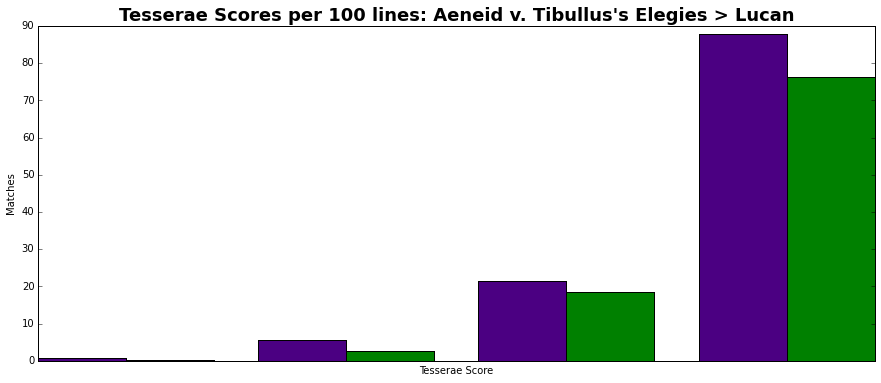

In [50]:
y1 = list(vergil_scores['per_100'])
y2 = list(tibullus_scores['per_100'])

n = 4

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)
bar_width = 0.4  # default: 0.8
bar_locations = np.arange(n)

ax.set_title('Tesserae Scores per 100 lines: Aeneid v. Tibullus\'s Elegies > Lucan', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.invert_xaxis()

ax.bar(bar_locations, y1, bar_width, color='indigo')
ax.bar(
    bar_locations - bar_width, 
    y2, 
    bar_width, 
    color='green'
)


plt.show()

In [51]:
file = data_dir + 'lucan-propertius-elegies.csv'
propertius = pd.read_csv(file)
print(propertius.head())

   RESULT  TARGET_LOC                                         TARGET_TXT  \
0       1  luc. 1.473  Est, qui, tauriferis ubi se **Mevania** **camp...   
1       2  luc. 2.722  Et iam Pleias hebet, flexi iam **plaustra** **...   
2       3  luc. 3.260  Fertilis Euphrates Phariae **vice** **fungitur...   
3       4  luc. 7.861  Navita, nec terram quisquam **movisset** **ara...   
4       5  luc. 5.117  Numinis aut poena est **mors** **immatura** re...   

      SOURCE_LOC                                         SOURCE_TXT  \
0   prop. 4.1.52     qua nebulosa cauo rorat **Meuania** **campo**,   
1   prop. 3.5.35  cur serus versare boves et **plaustra** **Boot...   
2  prop. 4.11.75  **fungere** maternis **uicibus**, pater: illa ...   
3   prop. 4.1.25   uerbera pellitus saetosa **mouebat** **arator**,   
4    prop. 3.7.2       per te **immaturum** **mortis** adimus iter;   

              SHARED  SCORE  
0    campus; meuania     10  
1  bootes; plaustrum     10  
2      uicis; fungor     1

In [52]:
print('There are', len(propertius), 'Tesserae results.')

propertius = propertius.loc[propertius['SCORE'] >= cutoff]

print('There are', len(propertius), 'Tesserae results with scores 7 or higher.')
print('\n')

propertius_scores = propertius.groupby('SCORE').agg({'SCORE': [np.size]})

print(propertius_scores)

There are 13812 Tesserae results.
There are 3470 Tesserae results with scores 7 or higher.


      SCORE
       size
SCORE      
7      2703
8       628
9       126
10       13


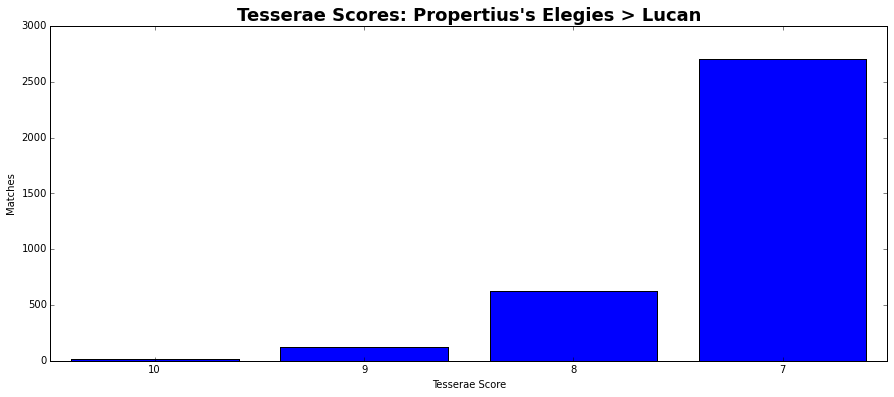

In [53]:
x = list(propertius_scores.index)
y = list(propertius_scores['SCORE']['size'])

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)

ax.bar(x, y, align='center', color='blue')
ax.set_title('Tesserae Scores: Propertius\'s Elegies > Lucan', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.invert_xaxis()
plt.show()

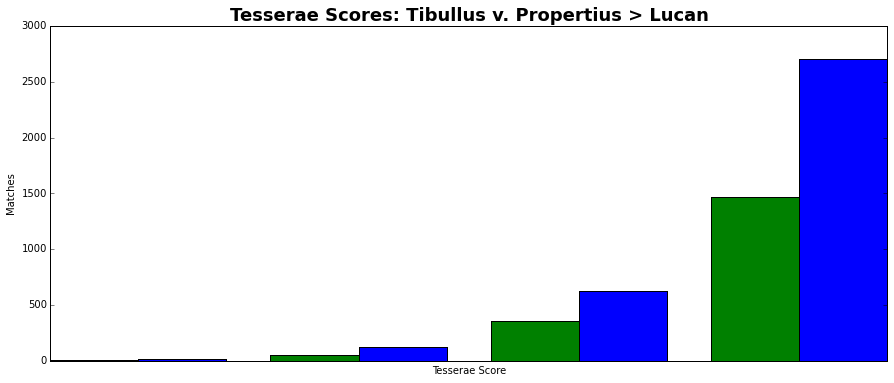

In [54]:
x1 = list(tibullus_scores.index)
x2 = list(propertius_scores.index)
y1 = list(tibullus_scores['SCORE']['size'])
y2 = list(propertius_scores['SCORE']['size'])

n = 4

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)

bar_width = 0.4  # default: 0.8
bar_locations = np.arange(n)

ax.set_title('Tesserae Scores: Tibullus v. Propertius > Lucan', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)

ax.invert_xaxis()
ax.bar(bar_locations, y1, bar_width, color="green")
ax.bar(
    bar_locations - bar_width, 
    y2, 
    bar_width, 
    color='blue'
)

plt.show()

In [55]:
propertius_lines = 703 + 1359 + 986 + 934
propertius_scores['per_100'] = propertius_scores['SCORE']['size'].map(lambda x: round((x / propertius_lines) * 100,2))
print(propertius_scores)

      SCORE per_100
       size        
SCORE              
7      2703   67.88
8       628   15.77
9       126    3.16
10       13    0.33


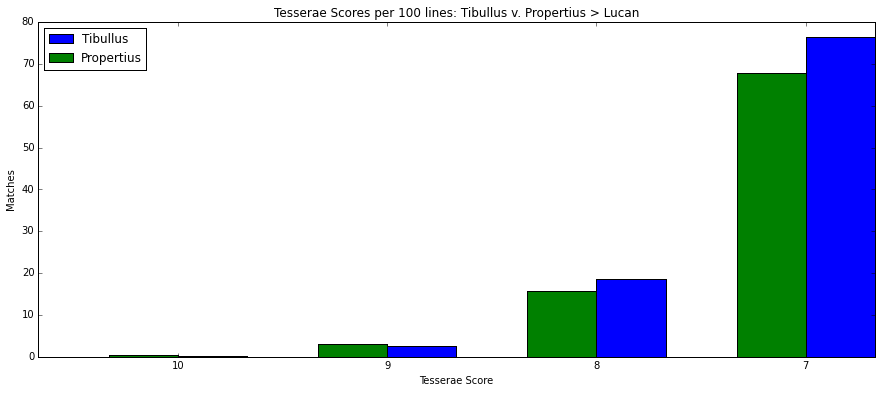

In [56]:
y1 = list(tibullus_scores['per_100'])
y2 = list(propertius_scores['per_100'])

N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.33       # the width of the bars

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, y1, width, color='b')
rects2 = ax.bar(ind+width, y2, width, color='g')

ax.set_title('Tesserae Scores per 100 lines: Tibullus v. Propertius > Lucan')
ax.set_ylabel('Matches')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('7', '8', '9','10') )
ax.set_xlabel('Tesserae Score')



ax.invert_xaxis()

ax.legend( (rects1[0], rects2[0]), ('Tibullus','Propertius'), loc = 2 )

plt.show()

### Ovid's Elegy and Lucan

In [57]:

ovid_results = [list(x) for x in zip(names, ovid)]

for result in ovid_results:
    result[1] = result[1].loc[result[1]['SCORE'] >= cutoff]

for item in ovid_results:
    print('There are',len(item[1]),'matches in',item[0],'with scores 7 or higher.')  
    
print('\n')
    
ovid_scores = []

for result in ovid_results:    
    temp = result[1].groupby('SCORE').agg({'SCORE': [np.size]})
    ovid_scores.append(temp) 
    
ovid_amores_lines = 763 + 812 + 870
ovid_ars_lines = 772 + 746 + 812
ovid_heroides_lines = 116 + 148 + 154 + 176 + 150 + 166 + 198 + 120 + 168 + 152 + 130 + 214 + 160 + 130 + 220 + 378 + 268 + 218 + 210 + 244 + 250 
ovid_medicamina_lines = 100
ovid_remedia_lines = 814

ovid_lines = [ovid_amores_lines,ovid_ars_lines,ovid_heroides_lines,ovid_medicamina_lines,ovid_remedia_lines]

ovid_scores = [list(x) for x in zip(ovid_scores,ovid_lines)]    

for scores in ovid_scores:
    scores[0]['per_100'] = scores[0]['SCORE']['size'].map(lambda x: (x / scores[1]) * 100)
    
for scores in ovid_scores:
    print(scores[0],'\n')

NameError: name 'ovid' is not defined

In [ ]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.18       # the width of the bars

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)


y1 = list(ovid_scores[0][0]['per_100'])
y2 = list(ovid_scores[1][0]['per_100'])
y3 = list(ovid_scores[2][0]['per_100'])
y4 = list(ovid_scores[3][0]['per_100'])
y5 = list(ovid_scores[4][0]['per_100'])

rects1 = ax.bar(ind, y1, width, color='r')
rects2 = ax.bar(ind+width, y2, width, color='g')
rects3 = ax.bar(ind+width*2, y3, width, color='b')
rects4 = ax.bar(ind+width*3, y4, width, color='orange')
rects5 = ax.bar(ind+width*4, y5, width, color='y')

ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('7', '8', '9','10') )

ax.invert_xaxis()

ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), names, loc = 2 )


def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
#autolabel(rects5)


plt.show()


### Bernstein's Score

In [ ]:
# Sample counts from Propertius
scores_counts =[(7,2703),(8,628),(9,126),(10,13)]

def bernstein(scores_counts):
    bernstein = 0
    for score in scores_counts:
        if score[0] == 7:
            bernstein += score[1] * .057
        elif score[0] == 7:
            bernstein += score[1] * .225
        elif score[0] == 7:
            bernstein += score[1] * 1
        elif score[0] == 7:
            bernstein += score[1] * 6.168
    return(bernstein)

print(bernstein(scores_counts))

# Mapping Allusive Density

Let's use Tesserae to figure out where in Lucan's text we are most likely to see elegiac intertexts.

In [ ]:
import glob

results = pd.DataFrame()
filenames = np.array(glob.glob(data_dir+'*.csv'))

filenames = [f for f in filenames if 'vergil' not in f]

We need to add all of the elegy csv files to a single dataframe.

In [ ]:
for file in filenames:
    df = pd.read_csv(file)
    results = results.append(df)

results = results.reset_index(drop=True)

In [ ]:
print(results.head())

Here are the first five results from the combined file. Tesserae includes the author, book, and line information in one cell. We are going to want to use both book and line "location" data for our map. So we need to extract it into its own column. 

In [ ]:
# SEE http://www.swegler.com/becky/blog/2014/08/06/useful-pandas-snippets/
results['TARGET_AUTHOR'], results['TARGET_BOOK'], results['TARGET_LINE'] = zip(*results['TARGET_LOC'].apply(lambda x: x.split('.')))
#df['A'].apply(str)

results['TARGET_BOOK'] = results['TARGET_BOOK'].apply(int)
results['TARGET_LINE'] = results['TARGET_LINE'].apply(int)

In [ ]:
print(results.head())

In [ ]:
# Get results for a single book, sort
bc1 = results.loc[results['TARGET_BOOK'] == 1]
bc1 = bc1.sort_index(by=['TARGET_BOOK','TARGET_LINE'], ascending=[True,True])

In [ ]:
print(bc1.head())

In [ ]:
# Get number of matches for each line, sum the scores
line_scores = bc1.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.sum]})
print(line_scores.head())
print('\n')

print('I was curious about the highest sum, so...\n')
print(line_scores[line_scores['SCORE']['sum']==line_scores['SCORE']['sum'].max()])
print('\n')
print('BC 1.202: \'Caesar, ubique tuus (liceat modo, nunc quoque) miles.\'')

In [ ]:
# Numpy agg function (obv.) leaves out lines that have no results, so we need to put the zeroes back in
x = list(line_scores.index)
y = list(line_scores['SCORE']['sum'])

b1_len = 695 #length of Book 1
z = []

for i in range(1,b1_len+1):
    if i in x:
        z.append((i,y[x.index(i)]))
    else:
        z.append((i,0))
        
scores = [list(t) for t in zip(*z)]

x = scores[0]
y = scores[1]

avg = sum(scores[1])/len(scores[1])


In [ ]:
fig = plt.figure()
fig.set_size_inches(15,5)
ax = fig.add_subplot(111)
ax.plot(y, color="k")
ax.axhline(y=avg, color='red')
ax.set_title('Allusive Density (Elegy) in Lucan BC 1',fontsize = 18, fontweight = "bold")
ax.set_xlabel('Line Number')
ax.set_ylabel('Sum of Scores')
plt.show()

In [ ]:
def smooth_list(x,window):
    smoothed_list = []
    for i in range(0,len(x)-window):
        smoothed_list.append(sum(x[i:i+window])/window)
    return smoothed_list

In [ ]:
window = 25
bc1_smooth = smooth_list(y,window)

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.set_ylim([0, 200])

ax.plot(bc1_smooth, color='k')
ax.axhline(y=avg, color='red')

ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 1',fontsize = 18, fontweight = "bold")
ax.set_xlabel('Line Number')
ax.set_ylabel('Sum of Scores')

plt.show()

In [ ]:
def add_blank_scores(x,y,length):
# Numpy agg function (obv.) leaves out lines that have no results, so we need to put the zeroes back in

    z = []

    for i in range(1,length+1):
        if i in x:
            z.append((i,y[x.index(i)]))
        else:
            z.append((i,0))
        
    scores = [list(t) for t in zip(*z)]

    return scores[0],scores[1]

Let's do the same thing for *BC* 3. The opening scene of this book (3.1-45)—Pompey's former wife Julia, now dead five years, visits him in a dream as he leaves Italy for Greece—is the scene which perhaps more than any other has received attention for being influence by Latin love elegy (specifically Propertius 4.7).

In [ ]:
bc3 = results.loc[results['TARGET_BOOK'] == 3]
bc3 = bc3.sort_index(by=['TARGET_BOOK','TARGET_LINE'], ascending=[True,True])
bc3_scores = bc3.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.sum]})

x = list(bc3_scores.index)
y = list(bc3_scores['SCORE']['sum'])

bc3_len = 762
x, y = add_blank_scores(list(bc3_scores.index),list(bc3_scores['SCORE']['sum']),bc3_len)

window = 25
bc3_smooth = smooth_list(y,window)

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.plot(bc3_smooth, color='k')

xticks = np.arange(0,max(x),50)
ax.set_xticks(xticks)

ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 3',fontsize = 18, fontweight = "bold")
ax.set_xlabel('Line Number')
ax.set_ylabel('Sum of Scores')

plt.show()

Zooming in on the first part of book...

In [ ]:
window = 25
bc3_smooth = smooth_list(y,window)[:250]

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.plot(bc3_smooth, color='k')

xticks = np.arange(0,250,50)
ax.set_xticks(xticks)

ax.axvline(8, color='r', linestyle='--')
ax.axvline(35, color='r', linestyle='--')
ax.axvspan(8, 35, alpha=0.5, color='pink')

avg = sum(bc3_smooth)/len(bc3_smooth)
ax.axhline(y=avg, color='lightgray')

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='pink', label='Julia Episode')
plt.legend(handles=[red_patch])


ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 3.1-250',fontsize = 18, fontweight = "bold")
ax.set_xlabel('Line Number')
ax.set_ylabel('Sum of Scores')

plt.show()

In [ ]:
bc10 = results.loc[results['TARGET_BOOK'] == 10]
bc10 = bc10.sort_index(by=['TARGET_BOOK','TARGET_LINE'], ascending=[True,True])
bc10_scores = bc10.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.sum]})

x = list(bc10_scores.index)
y = list(bc10_scores['SCORE']['sum'])
bc10_len = 546

x, y = add_blank_scores(list(bc10_scores.index),list(bc10_scores['SCORE']['sum']),bc10_len)

window = 25
bc10_smooth = smooth_list(y,window)

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.plot(bc10_smooth, color='k')

xticks = np.arange(0,max(x),50)
ax.set_xticks(xticks)

ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 10',fontsize = 18, fontweight = "bold")
ax.set_xlabel('Line Number')
ax.set_ylabel('Sum of Scores')

plt.show()

In [ ]:
bc10 = results.loc[results['TARGET_BOOK'] == 10]
bc10 = bc10.sort_index(by=['TARGET_BOOK','TARGET_LINE'], ascending=[True,True])
bc10_scores = bc10.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.sum]})

x = list(bc10_scores.index)
y = list(bc10_scores['SCORE']['sum'])
bc10_len = 546

x, y = add_blank_scores(list(bc10_scores.index),list(bc10_scores['SCORE']['sum']),bc10_len)

window = 25
bc10_smooth = smooth_list(y,window)

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.plot(bc10_smooth, color = 'k')

xticks = np.arange(0,max(x),50)
ax.set_xticks(xticks)

ax.axvline(53, color='r', linestyle='--')
ax.axvline(331, color='r', linestyle='--')
ax.axvspan(53, 331, alpha=0.5, color='pink')

avg = sum(bc10_smooth)/len(bc10_smooth)
ax.axhline(y=avg, color='lightgray')

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='pink', label='Cleopatra Episode')
plt.legend(handles=[red_patch])

ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 10', fontsize=14,fontweight='bold')
ax.set_xlabel('Line Number')
ax.set_ylabel('Sum of Scores')

plt.show()

In [ ]:
bc7 = results.loc[results['TARGET_BOOK'] == 7]
bc7 = bc7.sort_index(by=['TARGET_BOOK','TARGET_LINE'], ascending=[True,True])
bc7_scores = bc7.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.sum]})

x = list(bc7_scores.index)
y = list(bc7_scores['SCORE']['sum'])
bc7_len = 872

x, y = add_blank_scores(list(bc7_scores.index),list(bc7_scores['SCORE']['sum']),bc7_len)

window = 25
bc7_smooth = smooth_list(y,window)

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.plot(bc7_smooth, color='k')

xticks = np.arange(0,max(x),50)
ax.set_xticks(xticks)

ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 7',fontsize = 18, fontweight = "bold")
ax.set_ylabel('Sum of Scores')

plt.show()

In [ ]:
def plot_allusive_density(results, book, length, window=15):
    subset = results.loc[results['TARGET_BOOK'] == book]
    subset_scores = subset.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.sum]})
    
    subset_scores_index = list(subset_scores.index)
    subset_scores_list = list(subset_scores['SCORE']['sum'])
    x, y = add_blank_scores(subset_scores_index,subset_scores_list,length)
    subset_scores_list = y
    
    subset_scores_list_smoothed = smooth_list(subset_scores_list,window)

    avg = sum(subset_scores_list_smoothed)/len(subset_scores_list)
    
    
    fig = plt.figure()

    fig.set_size_inches(15,3)
    ax = fig.add_subplot(111)
    ax.axhline(y=avg, color='lightgray')
    ax.plot(subset_scores_list_smoothed, color="black")

    xticks = np.arange(0,max(x),50)
    ax.set_xticks(xticks)

    ax.set_ylim([0, 150])
    ax.set_xlim([0, 1108])

    ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC' + str(book) + ' (avg = ' + str(round(avg,1)) + ')', fontsize = 14, fontweight = 'bold')
    ax.set_xlabel('Line Number')
    ax.set_ylabel('Sum of Scores')

    plt.show()
    
lucan_book_lengths = [695,736,762,824,816,830,872,872,1108,546]
    
for i in range(1,11):
    plot_allusive_density(results, i, lucan_book_lengths[i-1],window=25)

# If you have any questions, feedback, etc.
## Patrick Burns
### email: paburns@fordham.edu or patrick@diyclassics.org
### twitter: @diyclassics

In [ ]:
results = pd.DataFrame()
filenames = np.array(glob.glob(data_dir+'*.csv'))

for file in filenames:
    df = pd.read_csv(file)
    results = results.append(df)

results = results.reset_index(drop=True)



In [ ]:
# SEE http://www.swegler.com/becky/blog/2014/08/06/useful-pandas-snippets/
results['TARGET_AUTHOR'], results['TARGET_BOOK'], results['TARGET_LINE'] = zip(*results['TARGET_LOC'].apply(lambda x: x.split('.')))
results['SOURCE_AUTHOR'] = results['SOURCE_LOC'].apply(lambda x: x[:x.index('.')])
#df['A'].apply(str)

results['TARGET_BOOK'] = results['TARGET_BOOK'].apply(int)
results['TARGET_LINE'] = results['TARGET_LINE'].apply(int)


In [ ]:
results = results.loc[results['SCORE'] >= 7]

In [ ]:
epic = results.loc[results['SOURCE_AUTHOR'] == 'verg']
elegy = results.loc[results['SOURCE_AUTHOR'] != 'verg']

In [ ]:
def smooth_list(x,window):
    smoothed_list = []
    for i in range(0,len(x)-window):
        smoothed_list.append(sum(x[i:i+window])/window)
    return smoothed_list

In [ ]:
def add_blank_scores(x,y,length):
# Numpy agg function (obv.) leaves out lines that have no results, so we need to put the zeroes back in

    z = []

    for i in range(1,length+1):
        if i in x:
            z.append((i,y[x.index(i)]))
        else:
            z.append((i,0))
        
    scores = [list(t) for t in zip(*z)]

    return scores[0],scores[1]

In [ ]:
def plot_allusive_density(results, book, length, window=15):
    subset = elegy.loc[results['TARGET_BOOK'] == book]
    subset_scores = subset.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.count_nonzero]})
    
    subset_scores_index = list(subset_scores.index)
    subset_scores_list = list(subset_scores['SCORE']['count_nonzero'])
    x, y = add_blank_scores(subset_scores_index,subset_scores_list,length)
    subset_scores_list = y
    
    subset_scores_list_smoothed = smooth_list(subset_scores_list,window)

    avg = sum(subset_scores_list_smoothed)/len(subset_scores_list)
    
    
    fig = plt.figure()

    fig.set_size_inches(15,3)
    ax = fig.add_subplot(111)
    #ax.axhline(y=avg, color='lightgray')
    ax.axhline(y=max(subset_scores_list_smoothed), color='lightgray')
    
    ax.plot(subset_scores_list_smoothed, color="black")

    xticks = np.arange(0,max(x),50)
    ax.set_xticks(xticks)

    ax.set_ylim([0, 30])
    ax.set_xlim([0, 1108])

    ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC' + str(book) + " (max = " + str(max(subset_scores_list_smoothed)) + ")" , fontsize = 14, fontweight = 'bold')
    ax.set_xlabel('Line Number')
    ax.set_ylabel('Sum of Scores')

    plt.show()
    
lucan_book_lengths = [695,736,762,824,816,830,872,872,1108,546]
    
for i in range(1,11):
    plot_allusive_density(results, i, lucan_book_lengths[i-1],window=1)

In [ ]:
def plot_allusive_density(results, book, length, window=15):
    subset = elegy.loc[results['TARGET_BOOK'] == book]
    subset_scores = subset.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.count_nonzero]})
    
    subset_scores_index = list(subset_scores.index)
    subset_scores_list = list(subset_scores['SCORE']['count_nonzero'])
    x, y = add_blank_scores(subset_scores_index,subset_scores_list,length)
    subset_scores_list = y
    
    subset_scores_list_smoothed = smooth_list(subset_scores_list,window)

    avg = sum(subset_scores_list_smoothed)/len(subset_scores_list)
    
    
    fig = plt.figure()

    fig.set_size_inches(15,3)
    ax = fig.add_subplot(111)
    #ax.axhline(y=avg, color='lightgray')
    ax.axhline(y=max(subset_scores_list_smoothed), color='lightgray')
    
    ax.plot(subset_scores_list_smoothed, color="black")

    xticks = np.arange(0,max(x),50)
    ax.set_xticks(xticks)

    ax.set_ylim([0, 4])
    ax.set_xlim([0, 1108])

    ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC' + str(book) + " (max = " + str(max(subset_scores_list_smoothed)) + ")" , fontsize = 14, fontweight = 'bold')
    ax.set_xlabel('Line Number')
    ax.set_ylabel('Sum of Scores')

    plt.show()
    
lucan_book_lengths = [695,736,762,824,816,830,872,872,1108,546]
    
for i in range(1,11):
    plot_allusive_density(results, i, lucan_book_lengths[i-1],window=25)